In [1]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt

op = os.path.join

In [2]:
DATA_DIR = "./frames/"

In [3]:
files = os.listdir(DATA_DIR)
print(len(files))   

21


In [4]:
test_img = cv.imread(op(DATA_DIR, files[0]))
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)

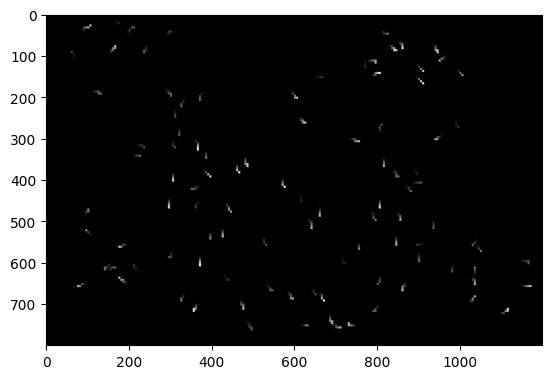

In [5]:
plt.imshow(test_img, cmap='gray')
plt.show()

## **OTSU's Method**

In [6]:
def get_histogram(img: np.ndarray) -> list:
    hist = np.zeros(256)
    
    assert img.dtype == np.uint8, "Image must be of type np.uint8"
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i, j]] += 1
            
    return hist

In [7]:
def otsu_recursive(hist):
    """
    Perform Otsu's thresholding using a recursive algorithm.
    
    Parameters:
    hist (numpy.ndarray): Histogram of the image.
    
    Returns:
    int: Optimal threshold value.
    """
    # Calculate total mean and total number of pixels
    total = np.sum(hist)
    mu = np.sum(hist * np.arange(len(hist))) / total
    
    # Initialization
    q1 = hist[0] / total
    mu1 = 0
    max_sigma = 0
    optimal_threshold = 0
    
    for t in range(1, len(hist)):
        q1_new = q1 + hist[t] / total
        mu1_new = (q1 * mu1 + t * hist[t] / total) / q1_new
        mu2_new = (mu - q1_new * mu1_new) / (1 - q1_new)
        
        sigma_squared = q1 * (1 - q1) * (mu1_new - mu2_new) ** 2
        
        if sigma_squared > max_sigma:
            max_sigma = sigma_squared
            optimal_threshold = t
        
        # Update q1 and mu1 for the next iteration
        q1 = q1_new
        mu1 = mu1_new
    
    return optimal_threshold

In [8]:
hist = get_histogram(test_img)

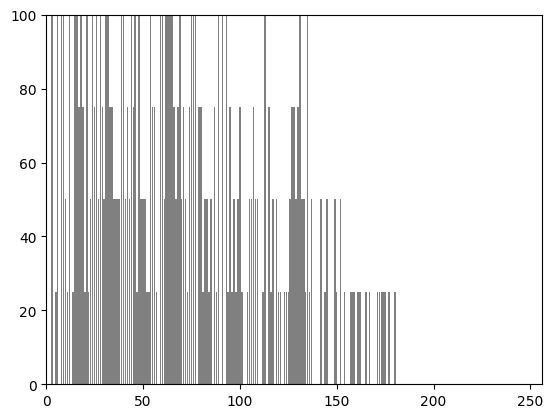

In [9]:
plt.bar(range(256), hist, color='gray')
plt.xlim([0, 256])
plt.ylim([0, 100])
plt.show()

In [12]:
otsu_threshold = otsu_recursive(hist)
print(otsu_threshold)

46


In [13]:
def binary_threshold(img: np.ndarray, threshold: int) -> np.ndarray:
    assert img.dtype == np.uint8, "Image must be of type np.uint8"
    
    binary_img = np.zeros_like(img)
    binary_img[img > threshold] = 255
    
    return binary_img

In [14]:
binary_img = binary_threshold(test_img, otsu_threshold)

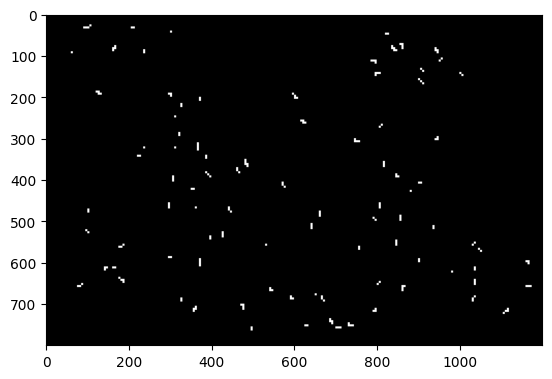

In [15]:
plt.imshow(binary_img, cmap='gray')
plt.show()